# Visualizing Data

Our generic analytics program template

1. Acquire data, which means finding a suitable file or collecting data from the web and storing in a file
2. Load data from disk and place into memory organized into data structures
2. Normalize, clean, or otherwise prepare data
3. Process the data, which can mean training a machine learning model, computing summary statistics, or optimizing a cost function
4. Emit results, which can be anything from simply printing an answer to saving data to the disk to generating a fancy visualization


To make loading data meaningful, we'll also learn how to generate histograms from data files using [matplotlib](https://matplotlib.org/).

missing values
	delete row
	insert value

## Two new BFFs

Get some administrative details out of the way

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

# jupyter notebook command (ignore)
%matplotlib inline

pandas.options.display.max_rows = 4 # Don't display too much data
np.set_printoptions(threshold=4)

asdfasfd

In [2]:
prices = pandas.read_csv('data/prices.txt')
print "type is", type(prices)
print "shape is", prices.shape
prices

type is <class 'pandas.core.frame.DataFrame'>
shape is (344, 1)


,0.605
0,0.600
1,0.594
...,...
342,1.898
343,1.891


numpy array is homogeneous 1, 2, or multidimensional array. they must all have the same type

In [3]:
m = prices.as_matrix()
print "type is", type(m)
print "shape is", m.shape
print m

type is <type 'numpy.ndarray'>
shape is (344, 1)
[[ 0.6  ]
 [ 0.594]
 [ 0.592]
 ..., 
 [ 1.939]
 [ 1.898]
 [ 1.891]]


We can also take a regular listing converted to an array

In [4]:
sizes = [28, 32, 34, 36, 38, 39, 40, 41]
a = np.array(sizes)
print "shape is", a.shape
print a

shape is (8,)
[28 32 34 ..., 39 40 41]


Two-dimensional is very common as well

In [21]:
stuff = [
    [ 18, 8, 307, 3504],
    [ 15, 8, 350, 3693],
    [ 18, 8, 318, 3436]
]
m = np.array(stuff)
print "shape is", m.shape
print m

shape is (3, 4)
[[  18    8  307 3504]
 [  15    8  350 3693]
 [  18    8  318 3436]]


## Plotting Time Series Data

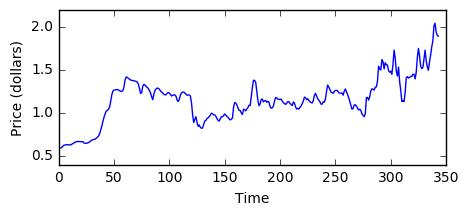

In [6]:
time = np.arange(0, len(prices), 1)
fig=plt.figure(figsize=(5, 2))
plt.plot(time, prices)
plt.xlabel("Time")
plt.ylabel("Price (dollars)")
plt.show()

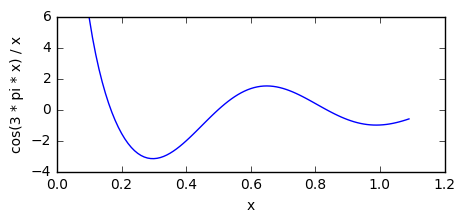

In [7]:
def f(x):
    return np.cos(3 * np.pi * x) / x

fig=plt.figure(figsize=(5, 2))
X = np.arange(.1, 1.1, 0.01) # from .1 to 1.1 by step 0.01 
# Get f(x) values in three different ways
# Option 1: (non-Pythonic)
Y = [] 
for x in X: Y.append(f(x))
# Option 2: (cool kids do this)
Y = [f(x) for x in X]
# Option 3: (most popular kids do this)
Y = f(X)  # a so-called broadcast; implied map

plt.plot(X, Y)
plt.xlabel("x")
plt.ylabel("cos(3 * pi * x) / x")
plt.show()

##  Visualizing the relationship between variables

In [8]:
cars = pandas.read_csv('data/cars.csv')
cars

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
...,...,...,...,...
390,28.0,4,120.0,2625
391,31.0,4,119.0,2720


In [9]:
m = cars.as_matrix()
print m

[[   18.     8.   307.  3504.]
 [   15.     8.   350.  3693.]
 [   18.     8.   318.  3436.]
 ..., 
 [   32.     4.   135.  2295.]
 [   28.     4.   120.  2625.]
 [   31.     4.   119.  2720.]]


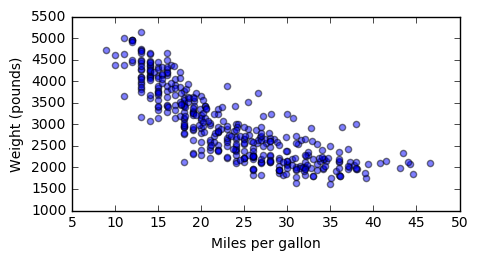

In [10]:
mpg = m[:,0]
wgt = m[:,3]
fig=plt.figure(figsize=(5, 2.5))
plt.scatter(mpg, wgt, alpha=0.5) # looks cooler with alpha (opacity) at 50%
plt.xlabel('Miles per gallon')
plt.ylabel('Weight (pounds)')
plt.show()

If we ever need a unique set, use

## Histograms

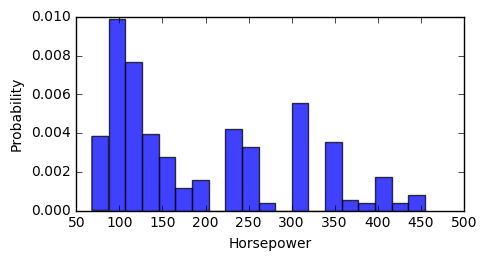

In [11]:
m = cars.as_matrix()
hp = m[:,2]
fig=plt.figure(figsize=(5, 2.5))
n, bins, patches = plt.hist(hp, 20, normed=1, alpha=0.75)
plt.xlabel('Horsepower')
plt.ylabel('Probability')
plt.show()

## Slicing and dicing


**Loading tables**

dataframes

In [12]:
sales = pandas.read_csv('data/sales-small.csv')
sales

,Date,Quantity,Unit Price,Shipping,Customer Name,Product Category,Product Name
0,10/13/10,6,38.94,35.00,Muhammed MacIntyre,Office Supplies,"Eldon Base for stackable storage shelf, platinum"
1,10/1/12,49,208.16,68.02,Barry French,Office Supplies,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera..."
...,...,...,...,...,...,...,...
29,10/21/12,49,6.08,1.17,Grant Carroll,Office Supplies,Col-Erase� Pencils with Erasers
30,1/1/11,10,5.98,4.38,Don Miller,Technology,"Imation 3.5"" DS/HD IBM Formatted Diskettes, 10..."


In [13]:
sales['Date']

0     10/13/10
1      10/1/12
        ...   
29    10/21/12
30      1/1/11
Name: Date, dtype: object

In [14]:
sales['Customer Name']

0     Muhammed MacIntyre
1           Barry French
             ...        
29         Grant Carroll
30            Don Miller
Name: Customer Name, dtype: object

can convert to matrix:

In [15]:
m = sales.as_matrix()
m[0] # get first row

array(['10/13/10', 6, 38.94, ..., 'Muhammed MacIntyre', 'Office Supplies',
       'Eldon Base for stackable storage shelf, platinum'], dtype=object)

In [16]:
m[:,0] # get first column

array(['10/13/10', '10/1/12', '10/1/12', ..., '11/8/10', '10/21/12',
       '1/1/11'], dtype=object)

In [17]:
m[:,4] # get fifth column

array(['Muhammed MacIntyre', 'Barry French', 'Barry French', ...,
       'Carlos Soltero', 'Grant Carroll', 'Don Miller'], dtype=object)

## Word clouds

tuples
list of tuples
dict

clean out punct, ws, nums, short words. filter out stop words

show unique words with set(words).

Python has a nice library called `wordcloud` we can use. It should already be installed in your Anaconda  Python directory, but if not use the command line:

```bash
$ pip install wordcloud
```

In [18]:
f = open('data/IntroIstanbul.txt')
contents = f.read() # read all content of the file
f.close()
words = contents.split(' ')
words = [w for w in words if len(w)>1]
words = [w.lower() for w in words]
words = [w.strip() for w in words]
print words[:20]

['the', 'city', 'and', 'its', 'people', 'istanbul', 'is', 'one', 'of', 'the', 'worlds', 'most', 'venerable', 'cities.', 'part', 'of', 'the', 'citys', 'allure', 'is']


In [19]:
from collections import Counter # a kind of dict
freq = Counter(words)
print "istanbul", freq['istanbul']
print "byzantine", freq['byzantine']
print "the", freq['the']
print freq.most_common(10)

istanbul 6
byzantine 3
the 123
[('the', 123), ('of', 55), ('and', 40), ('to', 18), ('in', 16), ('is', 14), ('from', 9), ('most', 9), ('city', 8), ('this', 7)]


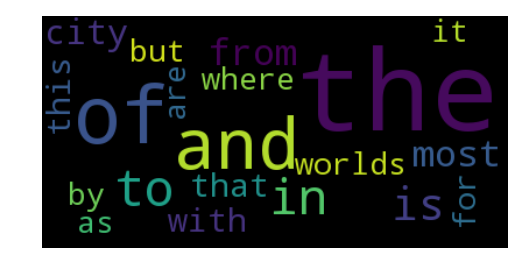

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud()

#... get tuples with (word,count) from categories Counter ...                      
wordtuples = Counter(words).most_common(20)
wordcloud.fit_words(dict(wordtuples))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()